In [1]:
# Task 1: Exploratory Data Analysis (EDA)
# 1. Load the dataset and perform basic data exploration
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wine.csv')
df.head()



,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


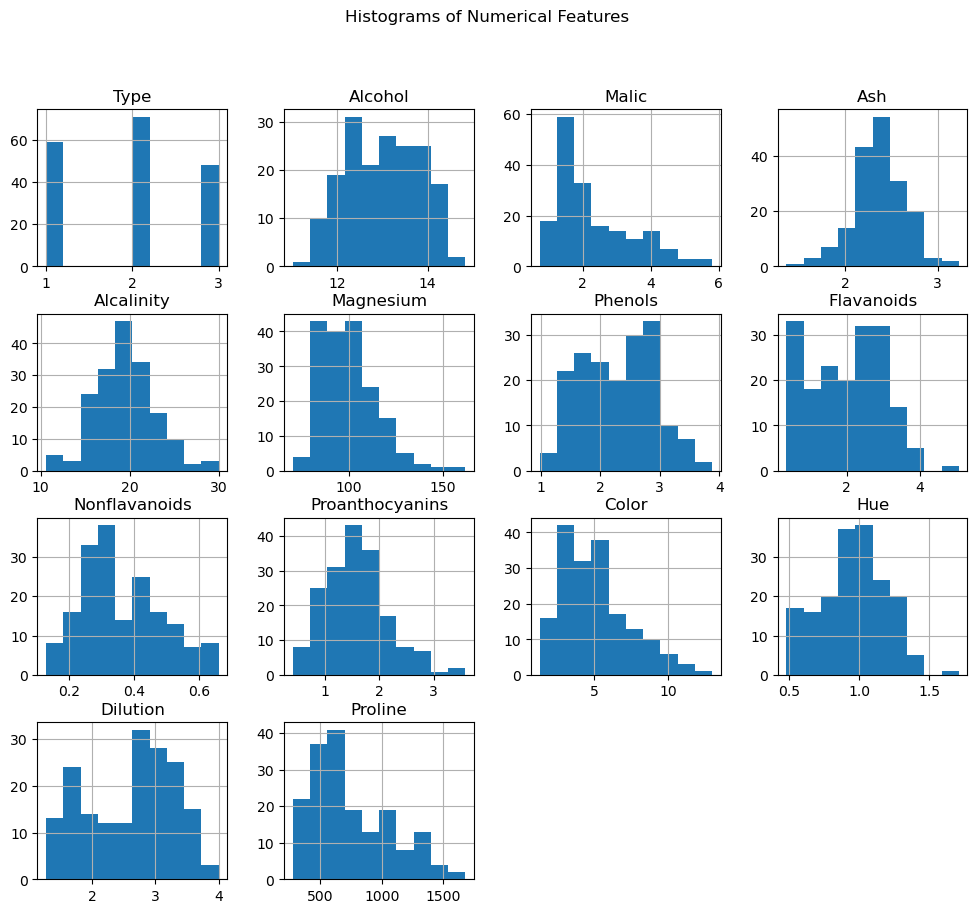

In [3]:
# 2. Examine the distribution of features
# Example: Histograms for all numerical features
df.hist(figsize=(12, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

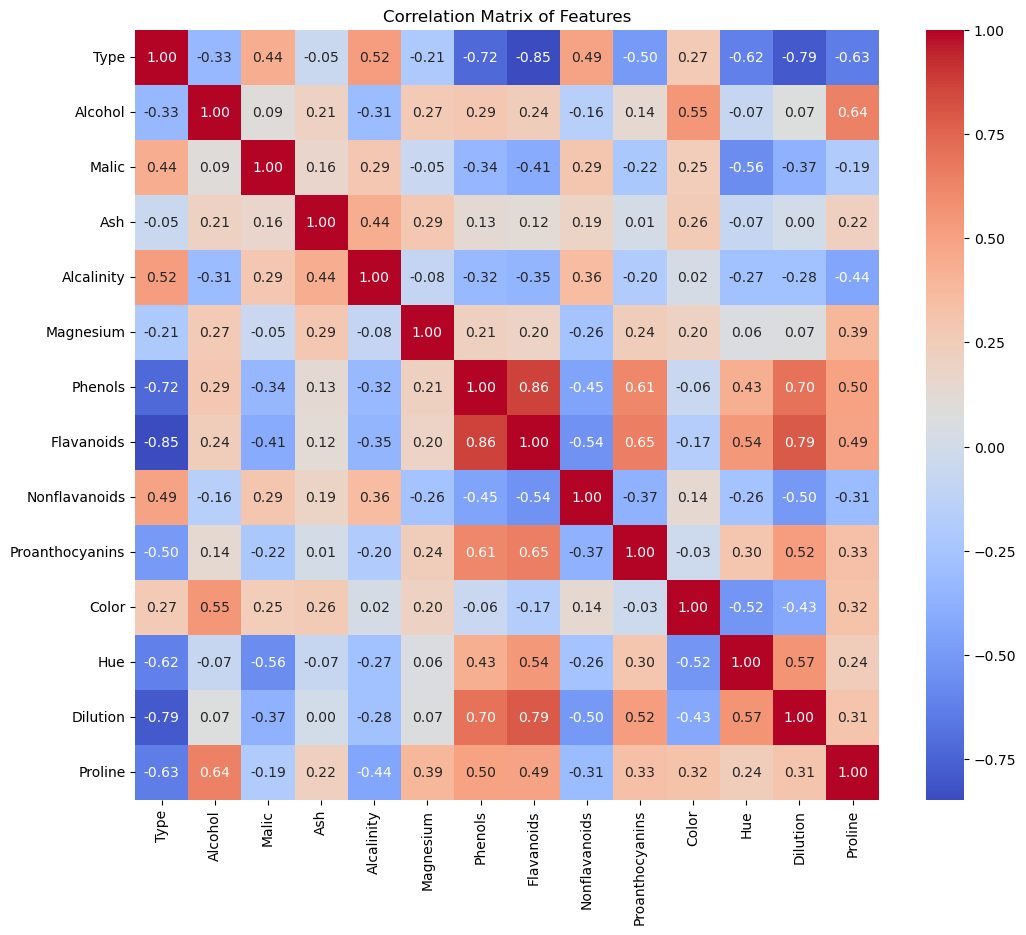

In [5]:
# 3. Investigate correlations between features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()


In [7]:
# Task 2: Dimensionality Reduction with PCA
# 1. Standardize the features
features = df.drop('Type', axis=1)  # Assuming 'Type' is the target variable
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [9]:
# 2. Implement PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_features)


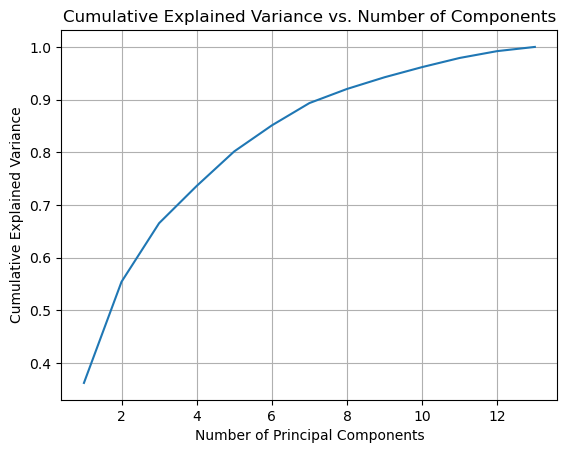

In [11]:
# 3. Determine the optimal number of principal components (using explained variance)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()

n_components = np.argmax(cumulative_variance >= 0.95) + 1 # Example: Select components explaining 95% of variance

pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_features)


C:\Users\Surbhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


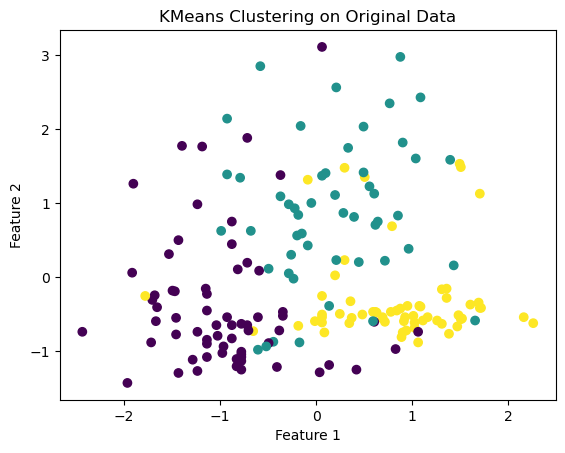

In [13]:
# Task 3: Clustering with Original Data
# 1. Apply KMeans clustering
kmeans_original = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters based on 'Type'
kmeans_original.fit(scaled_features)

# 2. Visualize Clustering results (example using the first two principal components)
# Plot in 2D
plt.scatter(scaled_features[:, 0], scaled_features[:,1], c=kmeans_original.labels_)

plt.title("KMeans Clustering on Original Data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

C:\Users\Surbhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


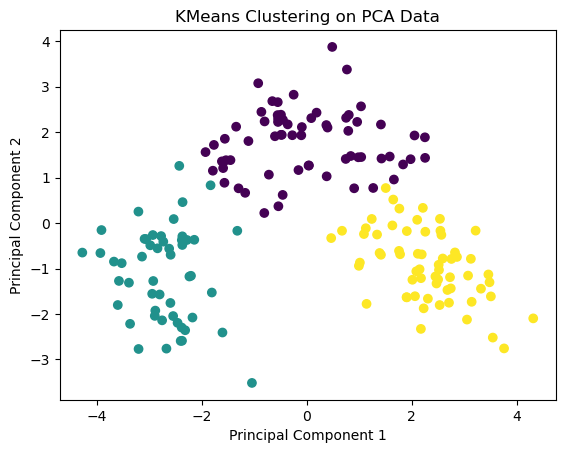

In [15]:
# Task 4: Clustering with PCA Data

# Apply Kmeans to PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_result)

# Visualize the clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1] if pca_result.shape[1] > 1 else np.zeros(pca_result.shape[0]), c=kmeans_pca.labels_)
plt.title("KMeans Clustering on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2" if pca_result.shape[1] > 1 else "Zeroes")
plt.show()